# Segunda Actividad: Cargando archivo CSV: 

- **Data source**: [Cantidad de ambulancias, camas y salas (consideradas trazadoras) por departamento, año y naturaleza jurídica para servicios habilitados](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Cantidad-de-ambulancias-camas-y-salas-consideradas/fa2g-cdft/about_data)
- **Introducción**: Seleccioné este dataset para desarrollar mi proyecto, trataré de analizar una problemática como lo es el la cantidad de salas y camas disponibles en hospitales, así como practicar los conocimientos adquiridos en clase, sobre la creación de gráficos.
- **Objetivo principal**: El objetivo principal de esta entrega es usar las librerías de Matplotlib y Seaborn como herramienta en mi análisis de los datos registrados en el dataset.

# 0. Librerias

In [2]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

# 1. Extracción de datos

In [5]:
#ruta = r'C:\Users\USER\OneDrive\Escritorio\ActividadesBIT\Actividad_2'
#df = pd.read_csv(ruta + '\\' + 'Cantidad_de_ambulancias__camas_y_salas__consideradas_trazadoras__por_departamento__a_o_y_naturaleza_jur_dica_para_servicios_habilitados_20240805.csv', sep = ',', encoding = 'utf-8')
path = os.getcwd()
files=os.listdir()
file= [x for x in files if 'Cantidad' in x][0]
print(file)
full_path= os.path.join(path, file)
print(full_path)
df = pd.read_csv(full_path, sep = ',', encoding = 'utf-8', low_memory=True)
df

Cantidad_de_ambulancias__camas_y_salas__consideradas_trazadoras__por_departamento__a_o_y_naturaleza_jur_dica_para_servicios_habilitados_20240805.csv
c:\Users\david\Downloads\RepositorioBIT\Actividad_2\Cantidad_de_ambulancias__camas_y_salas__consideradas_trazadoras__por_departamento__a_o_y_naturaleza_jur_dica_para_servicios_habilitados_20240805.csv


,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Adultos,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intensivo Adulto,CAMAS Cuidado Intensivo Neonatal,CAMAS Cuidado Intensivo Pediátrico,...,CAMAS Cuidado Intermedio Neonatal,CAMAS Cuidado Intermedio Pediátrico,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Pediátrica,CAMAS Psiquiatría,CAMAS Unidad de Quemados Adulto,CAMAS Unidad de Quemados Pediátrico,SALAS Partos,SALAS Quirófano
0,Amazonas,2017.0,Privada,0,0,41,0,0,0,0,...,0,0,0,2,7,0,0,0,0,1
1,Amazonas,2017.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,4,2
2,Amazonas,2018.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,0,1
3,Amazonas,2018.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,8,2
4,Amazonas,2019.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,491,0,45,0,0,...,0,0,0,0,168,0,0,0,44,0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,Vaupés,2022.0,Pública,2,0,14,0,0,0,0,...,0,0,0,1,8,0,0,0,3,0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Primero exploro la cantidad de rows y columns con la que voy a trabajar.
print(df.shape)
#Después reviso la información de los datos dentro del dataframe.
print(df.info())

(378, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departamento                         378 non-null    object 
 1   Año                                  377 non-null    float64
 2   Naturaleza jurídica                  377 non-null    object 
 3   AMBULANCIAS Básica                   378 non-null    int64  
 4   AMBULANCIAS Medicalizada             378 non-null    int64  
 5   CAMAS Adultos                        378 non-null    int64  
 6   CAMAS Cuidado Agudo Mental           378 non-null    int64  
 7   CAMAS Cuidado Intensivo Adulto       378 non-null    int64  
 8   CAMAS Cuidado Intensivo Neonatal     378 non-null    int64  
 9   CAMAS Cuidado Intensivo Pediátrico   378 non-null    int64  
 10  CAMAS Cuidado Intermedio Adulto      378 non-null    int64  
 11  CAMAS Cuidado Intermed

In [8]:
#Reviso los departamentos y la cantidad para hacer las gráficas.
Headers = df['Departamento'].unique()
print(Headers)
len(Headers)

['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bogotá D.C' 'Bolívar'
 'Boyacá' 'Caldas' 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Córdoba'
 'Cundinamarca' 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena'
 'Meta' 'Nariño' 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés y Providencia' 'Santander' 'Sucre' 'Tolima' 'Valle del cauca'
 'Vaupés' 'Vichada' 'Total general' 'Barranquilla' 'Buenaventura' 'Cali'
 'Cartagena' 'Santa Marta']


39

# 2. Primer Análisis: **Hospitales por departamento**

Naturaleza jurídica       Mixta  Privada  Pública
Departamento                                     
Amazonas                      0        5        5
Antioquia                     5        5        5
Arauca                        0        5        5
Atlántico                     2        5        5
Barranquilla                  1        1        1
Bogotá D.C                    1        5        5
Bolívar                       0        5        5
Boyacá                        0        5        5
Buenaventura                  0        1        1
Caldas                        5        5        5
Cali                          1        1        1
Caquetá                       0        5        5
Cartagena                     1        1        1
Casanare                      5        5        5
Cauca                         0        5        5
Cesar                         0        5        5
Chocó                         4        5        5
Cundinamarca                  1        5        5


<Figure size 1600x1000 with 0 Axes>

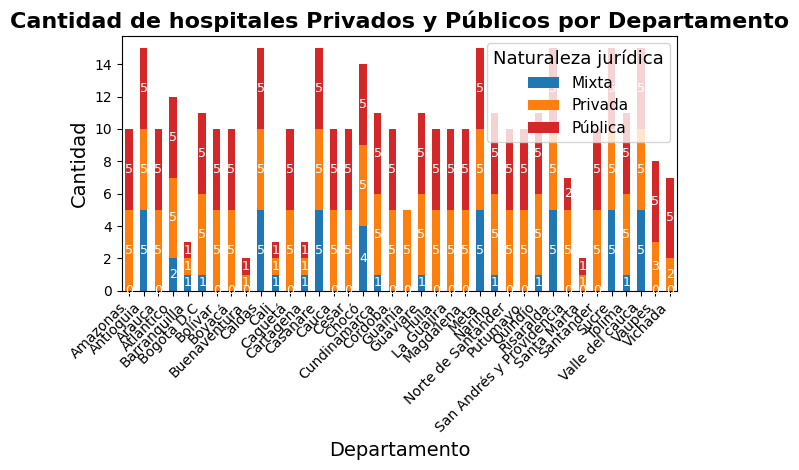

In [14]:
# Filtro
df_filtered = df[df['Departamento'] != 'Total general']

# Cont
conteo_por_departamento = df_filtered.groupby(['Departamento', 'Naturaleza jurídica']).size().unstack(fill_value=0)

# Mostrar
print(conteo_por_departamento)

# Plot
plt.figure(figsize=(16, 10))
conteo_por_departamento.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#d62728'])

# Titulo y labels
plt.title('Cantidad de hospitales Privados y Públicos por Departamento', fontsize=16, weight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Customizar la leyenda
plt.legend(title='Naturaleza jurídica', title_fontsize='13', fontsize='11', loc='upper right')

# Rotar x ticks
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='white')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('num_hopitales.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Podemos notar como primera impresión que en general, hay una buena cantidad de hospitales públicos y privados por departamento, siendo los hospitales mixtos, los menos comunes.

# 3. Segundo Análisis: **Ambulancias disponibles**

En esta categoría, los hospitales cuentan con dos tipos de ambulancias, la básica y la medicalizada.
La básica es una unidad de intervención con equipo específico de respuesta inicial, la cual es tripulada por auxiliar de enfermería y técnico o tecnólogo en atención prehospitalaria.
Por otra parte, la medicalizada es una unidad de intervención con equipo avanzado, tripulado por médico entrenado, enfermera o tecnólogo en atención prehospitalaria.

**Referencia**
[Dotación De Ambulancias; Transporte Asistencial Básico Y Medicalizado - Versión 2.0](https://proyectostipo.dnp.gov.co/images/pdf/ambulancias/PTambulancias.pdf)

                          AMBULANCIAS Básica  AMBULANCIAS Medicalizada
Departamento                                                          
Amazonas                                  10                         0
Antioquia                               2667                       558
Arauca                                   232                        54
Atlántico                                839                       299
Barranquilla                              93                        47
Bogotá D.C                              2712                      1077
Bolívar                                  727                       280
Boyacá                                  1096                       153
Buenaventura                              10                         8
Caldas                                   688                       114
Cali                                     342                        57
Caquetá                                  301                        71
Cartag

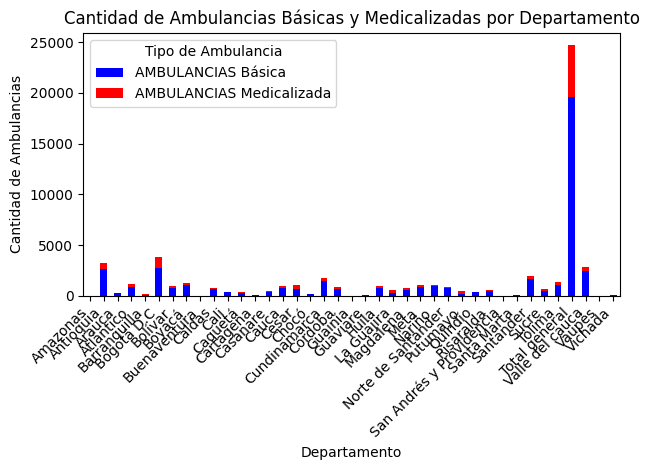

In [47]:

# Sumamos el número de ambulancias por tipo en cada departamento
suma_ambulancias = df.groupby('Departamento')[['AMBULANCIAS Básica', 'AMBULANCIAS Medicalizada']].sum()

# Se muestra el conteo para darme una idea y poder graficar la información.
print(suma_ambulancias)

# Se grafican los resultados
suma_ambulancias.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Cantidad de Ambulancias Básicas y Medicalizadas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Ambulancias')
plt.legend(title='Tipo de Ambulancia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('ambulancia_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

En esta gráfica cometí una equivocación ya que no pude deshacerme del total general. Sin embargo, podemos notar que hay departamentos que preocupantemente, no tienen casi ambulancias de ambos tipos como lo son: Buenaventura, Guainia, San Andrés y Providencia y Vaupes, lo que pronostica serias complicaciones en situaciones de riesgo donde se requiera brindar atención inicial al ciudadano o el transporte de heridos de gravedad. Se necesita realizar un llamado de atención a estos departamentos y dar visibilidad a esta problemática. Por otro lado, Bogotá tiene la mayoe cantidad de ambulancias, sobre todo, ambulancias medicalizadas. 

# 4. Tercer Análisis: **Camas de cuidado intensivo disponibles**

En esta categoría se tiene en cuenta que se analizaran tres tipos de camas de cuidado intensivo para urgencias diferentes, se tomarán en cuenta las UCI para neonatos, pediatría y para adultos. Teniendo en cuenta que la cama es equivalente a un 'cupo' para que un paciente pueda ser tratado. 

                          CAMAS Cuidado Intensivo Adulto  \
Departamento                                               
Amazonas                                               0   
Antioquia                                           2370   
Arauca                                                16   
Atlántico                                           2052   
Barranquilla                                         140   
Bogotá D.C                                          4134   
Bolívar                                              955   
Boyacá                                               321   
Buenaventura                                           0   
Caldas                                               522   
Cali                                                  80   
Caquetá                                               80   
Cartagena                                             32   
Casanare                                              77   
Cauca                                   

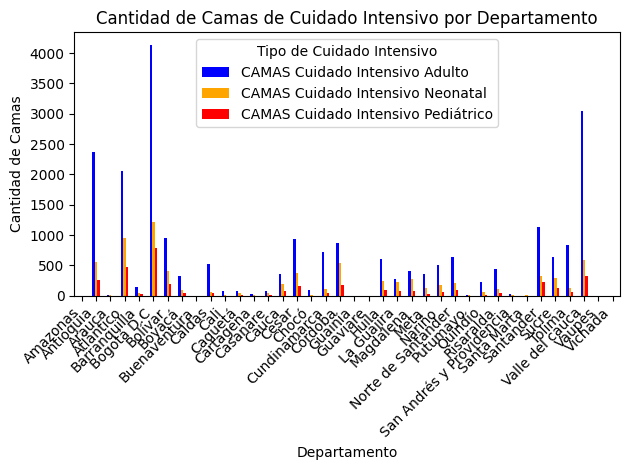

In [54]:
df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_camas = df_filtered.groupby('Departamento')[['CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intensivo Pediátrico']].sum()

# Mostrar el conteo
print(suma_camas)

# Graficar los resultados
suma_camas.plot(kind='bar', stacked=False, color=['blue', 'orange', 'red'])
plt.title('Cantidad de Camas de Cuidado Intensivo por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Camas')
plt.legend(title='Tipo de Cuidado Intensivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('USI_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Podemos evidenciar una situación preocupante, ya que hay departamentos que no registran ningún tipo de cama para cuidados intensivos como: Amazonas, Buenaventura, Guainia, Vaupes y Vichada. Esto hace que quiera enfatizar la necesidad de darle visibilidad a este tipo de problemáticas. 

En contra-posición, los departamentos con mayor cantidad de camas en esta categoría son Bogotá, Antioquia y Valle del Cauca.

# 5. Cuarto Análisis: **Cuidado Mental**

                          CAMAS Cuidado Agudo Mental  CAMAS Psiquiatría
Departamento                                                           
Amazonas                                           0                  0
Antioquia                                        112               2013
Arauca                                             0                  0
Atlántico                                        184               2586
Barranquilla                                       0                 30
Bogotá D.C                                       210               4261
Bolívar                                          152               1488
Boyacá                                           168                 20
Buenaventura                                       0                  0
Caldas                                           104                616
Cali                                               0                 42
Caquetá                                           40            

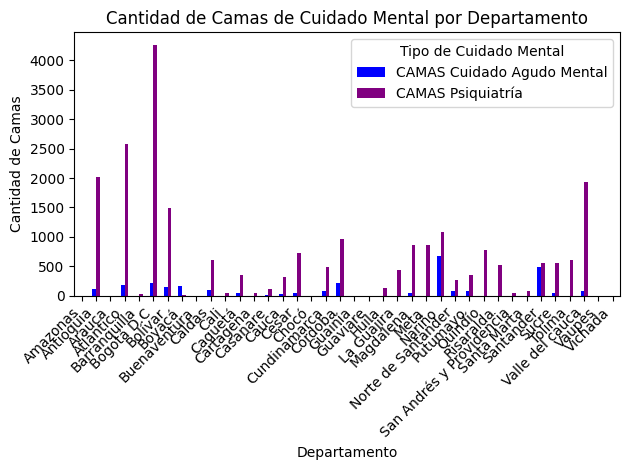

In [85]:
df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_camas = df_filtered.groupby('Departamento')[['CAMAS Cuidado Agudo Mental', 'CAMAS Psiquiatría']].sum()

# Mostrar el conteo
print(suma_camas)

# Graficar los resultados
suma_camas.plot(kind='bar', stacked=False, color=['blue', 'purple'])
plt.title('Cantidad de Camas de Cuidado Mental por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Camas')
plt.legend(title='Tipo de Cuidado Mental')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('CuidadoMental_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

En contra de lo que estaba esperando, hay una gran cantidad de camas disponibles para cuidado psiquiátrico. Sin embargo, se ve un patrón respecto a unos departamentos mencionados anteriormente, ya que, parece ser que no tienen camas especializadas para ningún tipo de circunstancia grave o de cuidado especial. 

Las camas de cuidado agudo mental no parecen ser algo común o que se priorice, al respecto, desconzco lo frecuente que sean este tipo de pacientes o incluso, la manera en la que se aborden estos tipos de problemas.

# 6. Quinto Análisis: **Sala de quirófano y de parto**

                          SALAS Partos  SALAS Quirófano
Departamento                                           
Amazonas                            38               14
Antioquia                          770             1707
Arauca                              35               53
Atlántico                          257             1106
Barranquilla                        30               49
Bogotá D.C                         294             2644
Bolívar                            247              446
Boyacá                             186              237
Buenaventura                         4                4
Caldas                             193              258
Cali                                23               19
Caquetá                            109               52
Cartagena                           12                6
Casanare                           112               62
Cauca                              281              161
Cesar                              221          

<Figure size 1800x1000 with 0 Axes>

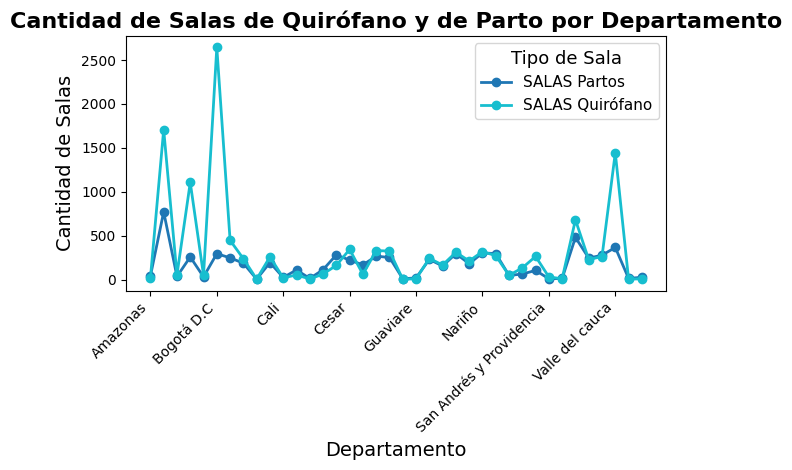

In [22]:
df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_salas = df_filtered.groupby('Departamento')[['SALAS Partos', 'SALAS Quirófano']].sum()

# Mostrar el conteo
print(suma_salas)

plt.figure(figsize=(18, 10))
suma_salas.plot(kind='line', stacked=False, color=['#1f77b4', '#17becf'], marker='o', linewidth=2)

# Add title and labels
plt.title('Cantidad de Salas de Quirófano y de Parto por Departamento', fontsize=16, weight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Salas', fontsize=14)

# Customize legend
plt.legend(title='Tipo de Sala', title_fontsize='13', fontsize='11', loc='upper right')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)


# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [82]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('Parto_Quirofano_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Podemos notar que aún cuando se habla de algo indispensable como lo es una sala de quirófano para operar a ciudadanos en situaciones críticas, todavía hay departamentos que no registran salas disponibles, lo que readirma el problema que llevamos desarrollando a lo largo del proyecto. La mayoría de departamentos cuentan con estas salas, pero hay un patrón con respecto a estos lugares que no cuentan con los recursos para enfrentarse a situaciones de riesgo. 

En el caso de las salas de parto, en mayor o menor medida, los departamentos cuentan con estos espacios, lo cual es mucho decir con respecto a otros módulos o herramientas de atención a la salud.

# 7. Conclusion

Como conclusión final y después de haber visto estas representaciones, Colombia se encuentra muy desarrollada en temas de atención o intervención en urgencias de la salud en una buena parte de sus departamentos, destacando su capital Bogotá, Antioquia y Valle del Cauca. 

Sin embargo, a lo largo de esta segunda entrega hemos podido notas que hay departamentos que se encuentran completamente desprotegidos o poco desarrollados para la intervención de situaciones graves o especializadas, esto es un riesgo para estas comunidades y es un problema el cual se debo dar la visibilidad necesaria, para que las entidades estatales puedan ayudar a esos departamentos para que pronto, se pueda corregir esta problemática. 